In [51]:
%matplotlib inline
import time
import matplotlib.pyplot as plt
import numpy as np
import mxnet as mx
import random as rand
from sklearn.datasets.samples_generator import make_blobs
from utils import *
np.set_printoptions(precision=3)

Optimization Technique Paper

In this class, we have only begun to scratch the surface of optimization techniques.  The simplex algorithmis a specialized method for linear programs.  However, if a linear program possesses certain special qualities,faster algorithms can be employed.  Additionally, linear programs with integer constraints cannot be easilytackled by the simplex algorithm.
    
For nonlinear optimization, the challenges become more severe and the solutions more specialized.  Spe-cialized  methods  for  quadratic  optimization  problems  and  quadratically  constrained  quadratic  programswere developed in the late 20th century.  We will talk a bit about methods for tackling constrained convexoptimization problems, but not in great depth.  General nonlinear problems present a seemingly impossiblechallenge.  And yet, algorithms are being developed to this day that perform well on nonconvex problems inspecific application areas (most notably:  machine learning and neural networks).
    
For this project, you will select an optimization method we did not discuss in depth in class.  See below forsome possible choices.  You will write a moderate length (5-10 page roughly) paper about this optimizationmethod.  Your paper should be typeset in LATEX.  It should accomplish the following goals:
    
    •Describe the origins of the method–Who first developed this method and for what problem(s)?–Include citations to primary source literature (peer-reviewed scientific papers) when possible
    
    •Describe what types of problems to which the method can or should be applied–What are the advantages of the method?  Disadvantages?
    
    •Demonstrate how to apply this problem to at leasttwoexample problems
    
        –This could be by hand or through the development of software,  depending on the context of theproblem
    
        –You  may  use  toy  problems  (small  simple  problems  that  are  most  useful  for  demonstrations),however extra credit will be awarded if you use the technique to solve a problem that would bevery challenging or impossible to solve in any other way
    
    •Comment upon the shortcomings of the method and any potential opportunities for improvement
    
If you accomplish the above goals (see also the rubric below for a more comprehensive outline of expectations)in fewer than five pages, you will still receive full credit.  Five to ten pages is simply a recommendation.

Historical Context (5 points)

Optimization techniques are not developed in a vacuum.  These are problem-solving tools developed to solvespecific problems.  They are also inspired by or related to other preceding optimization techniques.  Thispaper should situate the described numerical method in the context of its time and include proper attribution(parenthetical citations and a bibliography).















Description of Technique (20 points)

The author should describe in general how the technique works.  This will require the author to describeor explicitly write the general form of the optimization problem for which this technique can be used anddescribein wordswhat specifically is done at each step.  Mathematical manipulations and formulae can beemployed, but the bulk of this section should be text!

# EXAMPLE 1: 2-class linear classification

For the first example, we will use stochastic gradient decent to classify a set of objects. The data used will be classified into 2 distinct classes. The algorithim will attempt to reduce the error in classifying a given point by utilizing the mean squares equation. By calculating the weights of a given batch, the sigmoid function can be used to classify a given X.




### Predfine some usefull functions

In [48]:
#using sigmoid activation fxn for classification
def sigmoid_activation(x):
    # compute and return the sigmoid activation for x
    return 1.0 / (1 + np.exp(-x))

#generate batches
def next_batch(X, y, batchSize):
    # loop over our dataset `X` in mini-batches of size `batchSize`
    for i in np.arange(0, X.shape[0], batchSize):
        # yield a tuple of the current batched data and labels
        yield (X[i:i + batchSize], y[i:i + batchSize])        

### Define stochastic gradient decent for linear regression

In [46]:
def sgd_linear(X, y, epochs, batch_size, learning_rate):
    '''
    Input:
    X    = set of features (what we use to predict)
    y    = the label (what we want to predict)
    epochs  = number of itterations to run
    batch_size = size of batch per itteration
    learning_rate = step size of a itteration
    
    Returns:
    W = predicted coefficients of polynomial
    lossHist = loss fxn value at each step
    '''
    
    #merge bias into X vector
    X = np.c_[np.ones((X.shape[0])), X]

    #initilize weights
    W = np.random.uniform(size=(X.shape[1],))
    
    #to graph effect of epoch overtime
    lossHist = []
    
    for epoch in np.arange(0,epochs):
        #find loss of epoch
        eLoss = []
        
        #process batch
        for (batchX, batchY) in next_batch(X,y, batch_size):
            #dot product of batch of features with weight
            wBatch = batchX.dot(W)
            
            #use activation function to classify value
            pred = sigmoid_activation(wBatch)
            
            #find error difference from true dataset
            error = pred - batchY
      
            #find total loss from sum of squares
            loss = np.sum(error ** 2)
            eLoss.append(loss)
            
            #calulate the gradient of the batch
            gradient = batchX.T.dot(error) / batchX.shape[0]

            #step in the gradient direction
            W += -learning_rate * gradient
            
        #update loss history
        lossHist.append(np.average(eLoss))   
    
    return W, lossHist, X

### Run algorithim on dataset

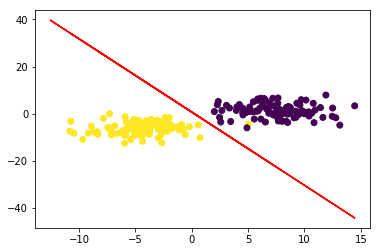

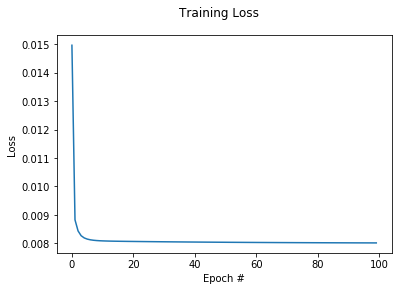

In [50]:
# creates a set of n_samples of 2 different classifications
(X, y) = make_blobs(n_samples=200, n_features=2, centers=2, 
                    cluster_std=2.5, random_state=25)

#define inputs for algorithim
epochs = 100
batch_size = 1
learning_rate = 0.1

#run SGD algorithim
W, lossHistory, X = sgd_linear(X, y, epochs, batch_size, learning_rate)

#line of best fit using predicted weights
Y = (-W[0] - (W[1] * X)) / W[2]

# plot the original data along with our line of best fit
plt.figure()
plt.scatter(X[:, 1], X[:, 2], marker="o", c=y)
plt.plot(X, Y, "r-")

# plot loss overtime
fig = plt.figure()
plt.plot(np.arange(0, epochs), lossHistory)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

### Example 1 Observations

The algorithim is able to find a W such that the error of classification is minimized. We can see from the first plot that the algorithim is able to classify the points based on their relative position to the line generated from W. Plot 2 shows that the optimal solution converges quickly for the first few itterations,then improvment slows drastically for each consecutive itteration.


# EXAMPLE 2: polynomial regression

For this example, we will test a stochastic gradient decent method on a dataset of randomized values around a predefined polynomial function 

    f(x) = 1 + 0.5 * x - 0.5 x^2 - 0.2 x^3 - 0.1 x^4 
    
using mean squares to calculate the error term. The algorithim will minimize the error between all points by solving the coefficients of the polynomial.



### Define stochastic gradient decent algorithim for polynomial regression

In [49]:
#formats X values for polynomial of dimension dim
def polynomial_features(x, dim):
    return np.column_stack([x ** i for i in range(dim + 1)])

def sgd_poly(X, y, dim, epoch, batch_size, learning_rate):
    '''
    Input:
    X    = set of features (what we use to predict)
    y    = the label (what we want to predict)
    dim  = dimmension of polynomial to solve
    epoch = number of itterations to run
    batch_size = size of batch per itteration
    learning_rate = step size of a itteration
    
    Returns:
    W = predicted coefficients of polynomial
    lossHist = loss fxn value at each step
    '''
    
    #format input to fit polynomial of given dimmension
    X = polynomial_features(X,dim)
    
    print("[INFO] starting training...")
    #initilize random weights
    W = np.random.uniform(size=(dim+1,))
    
    #to graph effect of epoch
    lossHist = []
    
    for epoch in np.arange(0,epochs):
        #find loss of epoch
        eLoss = []
        
        #process batch
        for (batchX, batchY) in next_batch(X,y, batch_size):
            #dot product of batch of features with weight
            wBatch = batchX.dot(W)
            
            #find error difference from true dataset
            error = wBatch - batchY
      
            #find total loss from sum of squares
            loss = np.sum(error ** 2)
            eLoss.append(loss)
           
            #calulate the gradient of the batch
            gradient = batchX.T.dot(error) / batchX.shape[0]
            
            #step in the gradient direction
            W += -learning_rate * gradient
            
        #update loss history
        lossHist.append(np.average(eLoss))   
    
    return W, lossHist




### Run algorithim on randomized data

[INFO] starting training...


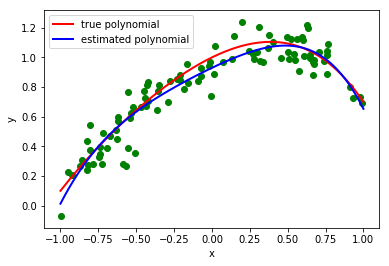

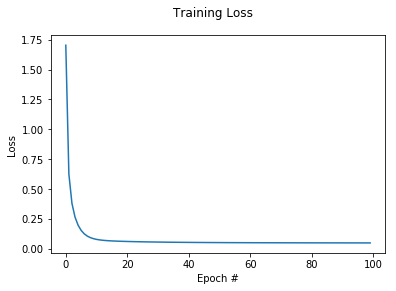

predicted polynomial coefficients
[ 0.93   0.489 -0.192 -0.168 -0.404]

actual values
[1, 0.5, -0.5, -0.2, -0.1]


<Figure size 432x288 with 0 Axes>

In [52]:
np.random.seed(int(time.time()))
#fxn = 1 + 0.5 * x - 0.5 x^2 - 0.2 x^3 - 0.1 x^4
coeffs = [1, 0.5, -0.5, -0.2, -0.1]
#generate random data around the curve
x, y = polynomial_data(coeffs, 100)
#show random data

y = y.ravel()

epoch = 100
dim = 4
batch_size = 5
learning_rate = 0.1

W, lossHist = sgd_poly(x, y, dim, epoch, batch_size , 
                                    learning_rate)
#plot prediced curve, true curve, and data
plt.scatter(x, y, color='green')
plt.xlabel("x")
plt.ylabel("y")
plot_polynomial(coeffs, color='red', label='true polynomial')
plot_polynomial(W, color='blue', label='estimated polynomial')
plt.legend()

#plot error
fig = plt.figure()
plt.plot(np.arange(epoch), lossHist)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

fig = plt.figure()

print("predicted polynomial coefficients")
print(W.flatten())
print("\nactual values")
print(coeffs)

### Example 2 Observations

The algorithim is able to find a W such that the error of between all points near the curve is minimized. We can see from the first plot that the algorithim is able to fit a curve over the dataset that is very close to the original function. Plot 2 shows that the optimal solution converges quickly for the first few itterations,then improvment slows drastically for each consecutive itteration. We can see that the coefficients the algorithim computed are very close to the original function.


Quality of Writing and Mathematical Demonstration (10 points)

Communicating about mathematical ideas in written form is a challenging skill to learn.  The author shouldpay attention to writing techniques in the process of producing this paper.